In [1]:
import numpy as np


class KMeans:
    def __init__(self, features: np.ndarray, k: int = 2, iterations: int = 100) -> None:
        """Initializes a K-means Clustering (KMeans) model."""

        self.features = features
        self.k = k
        self.iterations = 100

        num_samples = features.shape[0]

        self.centroids = features[np.random.choice(num_samples, size=k, replace=False)]
        self.closest = np.zeros(num_samples)

    def cluster(self) -> None:
        """Clusters the data according to the K-means Clustering (KMeans) algorithm."""

        for _ in range(self.iterations):
            old_closest = self.closest.copy()
            self.closest = np.argmin([np.linalg.norm(self.centroids - feature, axis=1) for feature in self.features], axis=1)

            for idx in range(self.k):
                self.centroids[idx] = np.mean(features[self.closest == idx], axis=0)

            if np.array_equal(self.closest, old_closest):
                break

In [2]:
np.random.seed(79)

features = np.random.rand(100, 2)

kmeans = KMeans(features, k=4, iterations=10)
kmeans.cluster()

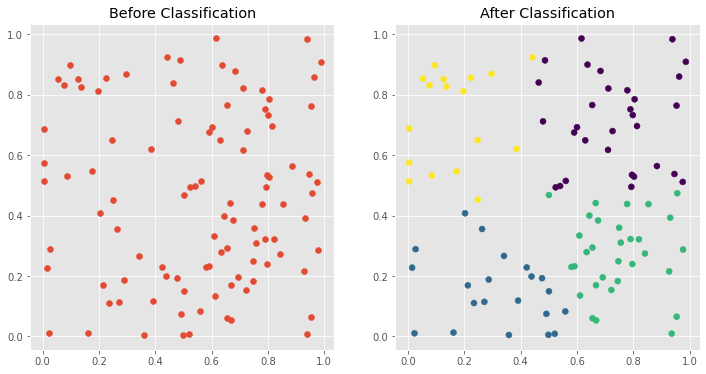

In [3]:
import matplotlib.pyplot as plt


plt.style.use("ggplot")
plt.figure(figsize=(12, 6), dpi=72)

plt.subplot(1, 2, 1)
plt.scatter(features[:, 0], features[:, 1])
plt.title("Before Classification")

plt.subplot(1, 2, 2)
plt.scatter(features[:, 0], features[:, 1], c=kmeans.closest)
plt.title("After Classification")

plt.show()